## PCA from scratch

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import rand
from math import pi

### Generated Dataset

In [20]:
#Generating random data (not required to be Gaussian as per lack of info in question statement)
x2 = random.sample(range(10, 1000), 200)
x2 = np.sort(np.array(x2)).reshape(25,8)
x2

array([[ 11,  18,  21,  24,  39,  47,  56,  57],
       [ 62,  71,  74,  75,  78,  81,  83,  88],
       [ 89, 102, 103, 104, 107, 108, 114, 116],
       [123, 124, 139, 146, 147, 154, 156, 157],
       [158, 160, 161, 168, 169, 172, 181, 183],
       [186, 190, 194, 200, 202, 207, 218, 223],
       [240, 246, 251, 252, 257, 260, 268, 290],
       [292, 295, 298, 299, 302, 308, 309, 314],
       [319, 320, 321, 331, 335, 340, 343, 348],
       [353, 355, 360, 361, 366, 368, 369, 372],
       [381, 391, 394, 405, 408, 412, 418, 419],
       [426, 437, 438, 447, 449, 451, 453, 455],
       [457, 458, 460, 461, 466, 470, 474, 479],
       [481, 483, 495, 504, 509, 510, 512, 513],
       [525, 531, 532, 533, 540, 543, 544, 546],
       [554, 582, 584, 585, 587, 588, 594, 597],
       [598, 612, 628, 630, 644, 650, 658, 660],
       [664, 666, 669, 670, 674, 676, 677, 689],
       [690, 698, 711, 719, 722, 725, 726, 727],
       [736, 741, 743, 747, 750, 753, 754, 760],
       [776, 781, 79

In [21]:
def myPCA(x,k):
   
    #mean of columns vector
    _, columns = x.shape
    
    x_mean = np.mean(x,axis=0).reshape(columns,1)
    #print("x_mean shape =\n",x_mean.shape)
    #print(x_mean)
    
    x_mean_modified = np.zeros(len(x)*columns).reshape(len(x),columns)
    for i in range(columns):
        for j in range(len(x)):
            x_mean_modified[j][i] = x_mean[i] 
    
    #print("x_mean_modified =\n",x_mean_modified)
    #print("x_mean_modified shape =\n",x_mean_modified.shape)
    
    #print("x_mean shape =\n",x_mean.shape)
    
    # Normalizing x for accurate comparison between different range of values (small vs big)
    
    x_norm = x - x_mean_modified
    #print("x_norm =\n",x_norm)
    
    # L matrix for computational trick
    L = np.dot(x_norm.T,x_norm)
    #print("L shape =\n",L.shape)
    #print("L =\n",L)
    #print("L max =",max(np.amax(L, axis = 1)))
    
    #calculating eigen vectors and eigen values
    values_L, vectors_L = np.linalg.eigh(L) #eigh function returns eigen values in ascending order
    
    #print("eigen values unsorted =\n",values_L)
    #print("eigen vectors unsorted =\n",vectors_L)
    
    #sorted eigen values and their corresponding eigen vectors
    index_sorted_desc = np.argsort(values_L)[::-1][0:k] # selecting k largest eigen values so that corresponding eigenvectors may be returned 
    k_eigen_vectors_L = vectors_L[:,index_sorted_desc] #k highest eigenvectors
    #print("index_sorted = \n",index_sorted_desc)
    #print("k_eigen_vectors_L sorted = \n",k_eigen_vectors_L)
    
    #eigen_vectors_sigma = np.dot(x_norm,eigen_vectors_L)
    
    #selecting k features
    
    #k_eigen_vectors_sigma = eigen_vectors_sigma[:,0:k]
    #print("k_eigen_vectors_sigma = \n",k_eigen_vectors_sigma)
    #print("shape of k_eigen_vectors_sigma",k_eigen_vectors_sigma.shape)
    
    reduced_data = np.dot(x_norm,k_eigen_vectors_L) # REDUCED
    #print("Shape of reduced_data =",reduced_data.shape)
    #print("Shape of k_eigen_vectors_L.T =",k_eigen_vectors_L.T.shape)
    pca_data = (np.dot(reduced_data,k_eigen_vectors_L.T)) + x_mean_modified # Reconstructed
    #print("Shape of pca_data =",pca_data.shape)
    
    #reduced data size by using k < total no. of features (784 for MNIST data)
    
    return pca_data, reduced_data

In [22]:
PCA1, PCA1_reduced_data = myPCA(x2,3)
print("Reconstructed data =\n",PCA1, "\n Reduced_data=\n",PCA1_reduced_data)
print("Reconstructed data shape=\n",PCA1.shape, "\n Reduced_data shape=\n",PCA1_reduced_data.shape)

Reconstructed data =
 [[   9.89880467   16.56896427   23.55458136   28.04643179   36.78164277
    43.96094638   53.44853203   60.74080822]
 [  63.71827624   69.21124523   72.10891426   76.26820471   78.84676388
    80.47809738   84.30980417   87.06432283]
 [  91.91878636   97.97148431  101.22199707  105.62444447  108.09213626
   109.60739181  113.15173271  115.41190465]
 [ 119.73864993  130.0266764   137.63711617  143.91438539  148.68886535
   151.79732745  156.62225225  157.57749125]
 [ 157.00508955  160.66138552  162.82006499  165.96404783  169.83378459
   173.27822874  178.38045713  184.04947222]
 [ 185.88588692  190.37049621  194.25228474  197.66484468  203.68175598
   209.131566    215.99227694  223.01414905]
 [ 243.30008776  244.96492505  247.5036098   249.45911522  257.00079764
   264.54479316  273.17761532  284.05042756]
 [ 291.77222505  295.42592851  297.00440167  300.06570063  302.90456727
   305.75582509  309.51383527  314.56337653]
 [ 316.68477158  321.77986484  325.3881052

## MNIST Dataset

In [24]:
x_train = pd.DataFrame(pd.read_csv("mnist_train.csv"))
x_test = pd.DataFrame(pd.read_csv("mnist_test.csv"))
y_test = (x_test['label'])
y_train = (x_train['label'])
x_test_labels = x_test
x_train_labels = x_train

x_train = x_train.drop('label', axis=1)
x_test = x_test.drop('label', axis=1)
#print(x_test)
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)

PCA_MNIST_test, PCA_reduced_data_MNIST_test = myPCA(x_test_np,2)
print("Reduced data =\n",PCA_reduced_data_MNIST_test)
#max(np.amax(x_test_np, axis = 1))

Reduced data =
 [[-411.26099613 -686.56161016]
 [  58.06593519  983.17025995]
 [-935.10533853  459.07466105]
 ...
 [-282.41557281 -550.85351605]
 [-287.27086568  155.85184876]
 [1144.16999564   22.71988935]]


In [25]:
print("PCA_MNIST_test shape=\n",PCA_MNIST_test.shape, "\nPCA_reduced_data_MNIST_test shape=\n",PCA_reduced_data_MNIST_test.shape)

PCA_MNIST_test shape=
 (10000, 784) 
PCA_reduced_data_MNIST_test shape=
 (10000, 2)


In [26]:
PCA_reduced_data_MNIST_test_pd = pd.DataFrame(PCA_reduced_data_MNIST_test)
PCA_reduced_data_MNIST_test_pd_classes = pd.concat([PCA_reduced_data_MNIST_test_pd, y_test],axis=1)
PCA_reduced_data_MNIST_test_pd_classes.columns = ['PC 1', 'PC 2', 'label']
PCA_reduced_data_MNIST_test_pd_classes

,PC 1,PC 2,label
0,-411.260996,-686.561610,7
1,58.065935,983.170260,2
2,-935.105339,459.074661,1
3,1255.666506,-106.992541,0
4,132.887049,-744.541845,4
...,...,...,...
9995,327.695238,559.444228,2
9996,531.398659,740.336631,3
9997,-282.415573,-550.853516,4
9998,-287.270866,155.851849,5


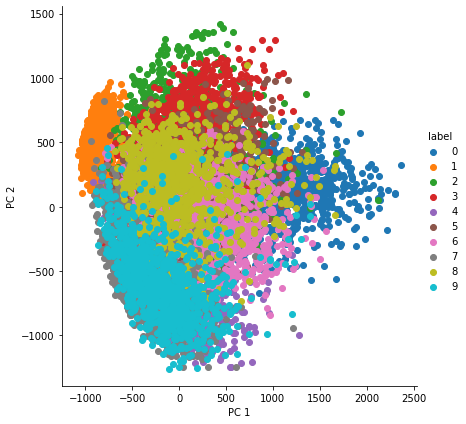

In [27]:
sns.FacetGrid(PCA_reduced_data_MNIST_test_pd_classes, hue='label', height=6).map(plt.scatter, 'PC 1', 'PC 2').add_legend()
plt.show()

## 10 Principal Components

In [31]:
PCA_MNIST_test, PCA_reduced_data_MNIST_test = myPCA(x_test_np,10)

print("PCA_MNIST_test shape=\n",PCA_MNIST_test.shape, "\nPCA_reduced_data_MNIST_test shape=\n",PCA_reduced_data_MNIST_test.shape)

PCA_MNIST_test shape=
 (10000, 784) 
PCA_reduced_data_MNIST_test shape=
 (10000, 10)


      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

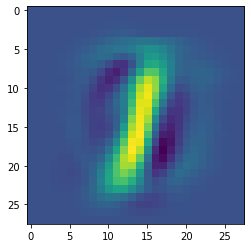

In [32]:
#Reconstructed output plot

print(x_test_labels)
print("Element with index 2 in MNIST test data has class =\t",x_test_labels.loc[2,'label'])
image = (PCA_MNIST_test[2:3,:784]).reshape(28,28) #Element 2 chosen arbitrarily to show working of myPCA(x,k) function
plot_image = plt.imshow(image)

### Logistic Regression with PCA

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# 30 PCs
PCA_MNIST_test, PCA_reduced_data_MNIST_test = myPCA(x_test_np,30)
print("PCA_MNIST_test shape=\n",PCA_MNIST_test.shape, "\nPCA_reduced_data_MNIST_test shape=\n",PCA_reduced_data_MNIST_test.shape)

PCA_MNIST_test shape=
 (10000, 784) 
PCA_reduced_data_MNIST_test shape=
 (10000, 30)


In [34]:
#Taking x_test and y_test as input data for this question

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_test, y_test, train_size = 0.7, random_state = 7)

x_train_PCA_split, x_test_PCA_split, y_train_PCA_split, y_test_PCA_split = train_test_split(PCA_MNIST_test, y_test, train_size = 0.7, random_state = 7)

In [35]:
import warnings
import time

warnings.filterwarnings("ignore")

# Original unreduced data
LogisticReg_test = LogisticRegression( max_iter = 10, multi_class = "multinomial" ) #specified 10 epochs and softmax i.e. for multiclass in question

time_start_unreduced = time.time()
LogisticReg_test.fit(x_train_split, y_train_split)
time_stop_unreduced = time.time()
time_diff_unreduced = time_stop_unreduced - time_start_unreduced
print('Time taken for training unreduced data: \t', time_diff_unreduced, 'seconds')
predicted_y_test_split = LogisticReg_test.predict(x_test_split)
acc_unreduced = (accuracy_score(y_test_split, predicted_y_test_split)) * 100 
print('Accuracy of unreduced data: \t ', acc_unreduced,"%")

# PCA data
LogisticReg_test_PCA = LogisticRegression( max_iter = 10, multi_class = "multinomial"  ) #specified 10 epochs and softmax i.e. for multiclass in question
time_start_PCA = time.time()
LogisticReg_test_PCA.fit(x_train_PCA_split, y_train_PCA_split)
time_stop_PCA = time.time()
time_diff_PCA = time_stop_PCA - time_start_PCA
print('Time taken for training reduced data: \t', time_diff_PCA, 'seconds')
predicted_y_test_PCA_split = LogisticReg_test.predict(x_test_PCA_split)
acc_PCA = (accuracy_score(y_test_PCA_split, predicted_y_test_PCA_split)) * 100
print('Accuracy of reduced data: \t ', acc_PCA,"%" )

time_diff_net = (time_diff_unreduced - time_diff_PCA)

#print(type(time_diff_PCA))
#print(type(time_diff_unreduced))
#print(type(time_diff_net))

print("Improvement in training time from unreduced data to PCA data is: \t", time_diff_net," seconds")
print("Difference in accuracy between unreduced data and PCA data is merely: \t", acc_unreduced - acc_PCA,"%")

Time taken for training unreduced data: 	 0.35008859634399414 seconds
Accuracy of unreduced data: 	  88.43333333333334 %
Time taken for training reduced data: 	 0.17453312873840332 seconds
Accuracy of reduced data: 	  86.43333333333332 %
Improvement in training time from unreduced data to PCA data is: 	 0.17555546760559082  seconds
Difference in accuracy between unreduced data and PCA data is merely: 	 2.000000000000014 %


### All PCs

In [36]:
RAW_MNIST_test, RAW_reduced_data_MNIST_test = myPCA(x_test_np,784)
#print("RAW_MNIST_test =\n",RAW_MNIST_test, "\nRAW_reduced_data_MNIST_test =\n",RAW_reduced_data_MNIST_test)
print("RAW_MNIST_test shape=\n",RAW_MNIST_test.shape, "\nRAW_reduced_data_MNIST_test shape=\n",RAW_reduced_data_MNIST_test.shape)

RAW_MNIST_test shape=
 (10000, 784) 
RAW_reduced_data_MNIST_test shape=
 (10000, 784)


In [37]:
"""coef_ndarray of shape (1, n_features) or (n_classes, n_features)
Coefficient of the features in the decision function.

coef_ is of shape (1, n_features) when the given problem is binary. In particular, when multi_class='multinomial', coef_ corresponds to outcome 1 (True) and -coef_ corresponds to outcome 0 (False)."""

coef_weights = LogisticReg_test.coef_ #the pre-trained Logistic Regression model using the raw data 
print(coef_weights)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


n_classes = 10


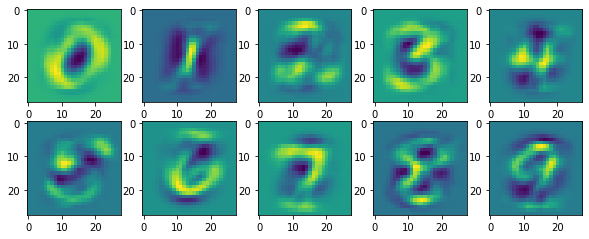

In [38]:
# Each output node has 784 weights associated with it. Reshape the weights to an 28x28 image
n_classes = len(np.unique(y_test))
classes = np.unique(y_test)
print("n_classes =",n_classes)

plt.figure(figsize=(10,10))
for i in range(n_classes):
    if(n_classes % 2 == 0):
        plt.subplot(n_classes/2,n_classes/2,i+1) #if even number of classes
        plt.imshow(coef_weights[i].reshape(28,28))
    if(n_classes % 2 == 1):
        plt.subplot((n_classes+1)/2,n_classes-((n_classes+1)/2) ,i+1) #if odd number of classes
        plt.imshow(coef_weights[i].reshape(28,28))

All PCs used to reconstruct the image results in the above images